In [42]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Readiing the combined dataset

df_flights = pd.read_csv(r'C:/Mumbai_Airport-International_Flight_Analysis/data/processed/flights_data_combined.csv')
df_flights.head()

,_id,Year,Quarter,Origin,Dest,Pax From Origin,Pax To Origin,Freight From Origin,Frieght To Origin
0,1,2015,1,MUMBAI,ABUDHABI,80696,65961,1940.80,1118.21
1,2,2015,2,MUMBAI,ABUDHABI,83807,79788,2578.68,1487.49
2,3,2015,3,MUMBAI,ABUDHABI,86560,70306,2661.29,2017.14
3,4,2015,4,MUMBAI,ABUDHABI,92011,90657,48903.98,1936.51
4,5,2015,1,MUMBAI,ADDIS ABABA,20996,16326,2622.94,116.01


In [44]:
# Checking the shape of the dataset

df_flights.shape

(1812, 9)

In [45]:
# Checking the columns of the dataset

df_flights.columns

Index(['_id', 'Year', 'Quarter', 'Origin', 'Dest', 'Pax From Origin',
       'Pax To Origin', 'Freight From Origin', 'Frieght To Origin'],
      dtype='object')

In [46]:
# Checking the informtion of the dataset

df_flights.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  1812 non-null   int64  
 1   Year                 1812 non-null   int64  
 2   Quarter              1812 non-null   int64  
 3   Origin               1812 non-null   object 
 4   Dest                 1812 non-null   object 
 5   Pax From Origin      1812 non-null   int64  
 6   Pax To Origin        1812 non-null   int64  
 7   Freight From Origin  1812 non-null   float64
 8   Frieght To Origin    1812 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 127.5+ KB


In [47]:
# Checking descriptive statistics of the dataset

df_flights.describe()

,_id,Year,Quarter,Pax From Origin,Pax To Origin,Freight From Origin,Frieght To Origin
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,93.789183,2019.155077,2.444812,26879.288079,25108.639073,1286.747152,873.033515
std,55.755142,2.732853,1.112521,45357.233060,43139.202931,2488.130233,1559.967978
min,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,2017.000000,1.000000,824.250000,834.500000,30.590000,1.037500
50%,91.000000,2019.000000,2.000000,11493.000000,10956.500000,409.585000,96.635000
75%,141.000000,2021.000000,3.000000,35650.250000,32922.000000,1421.475000,865.865000
max,210.000000,2024.000000,4.000000,338533.000000,334269.000000,48903.980000,7932.740000


In [48]:
df_flights.rename(columns={'Frieght To Origin': 'Freight To Origin'}, inplace=True)  # Correcting the column name

In [49]:
df_flights.columns

Index(['_id', 'Year', 'Quarter', 'Origin', 'Dest', 'Pax From Origin',
       'Pax To Origin', 'Freight From Origin', 'Freight To Origin'],
      dtype='object')

In [50]:
# Assuming df_flights is your DataFrame
flights_count = df_flights.groupby(['Year', 'Dest']).size().reset_index(name='Total Flights')

# Print the first few rows to verify
print(flights_count.head())

   Year         Dest  Total Flights
0  2015     ABUDHABI              4
1  2015  ADDIS ABABA              3
2  2015         ADEN              4
3  2015    AMSTERDAM              1
4  2015      BAHRAIN              4


In [51]:
pivot_flights = flights_count.pivot(index='Year', columns='Dest', values='Total Flights')

# Print the first few rows to verify
print(pivot_flights.head())

Dest  ABUDHABI  ADDIS ABABA  ADEN  AMMAN  AMSTERDAM  ANTALYA  AUCKLAND  \
Year                                                                     
2015       4.0          3.0   4.0    NaN        1.0      NaN       NaN   
2016       4.0          4.0   4.0    NaN        4.0      3.0       NaN   
2017       4.0          4.0   4.0    NaN        4.0      4.0       NaN   
2018       4.0          4.0   4.0    NaN        4.0      NaN       NaN   
2019       4.0          2.0   4.0    NaN        4.0      NaN       NaN   

Dest  Atyrau  BAHRAIN  BANGKOK  ...  TEHRAN  TELAVIV  TORONTO  Turkmenabat  \
Year                            ...                                          
2015     NaN      4.0      4.0  ...     4.0      4.0      NaN          NaN   
2016     NaN      4.0      4.0  ...     4.0      4.0      NaN          NaN   
2017     NaN      4.0      4.0  ...     4.0      4.0      1.0          NaN   
2018     NaN      4.0      4.0  ...     4.0      4.0      4.0          NaN   
2019     NaN 

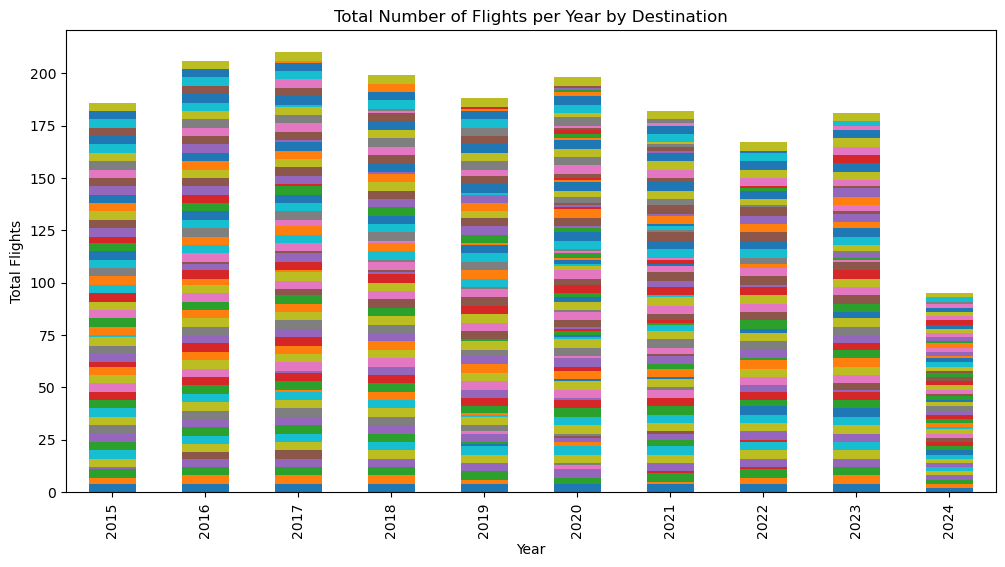

In [52]:
pivot_flights.plot(kind='bar', stacked=True, figsize=(12, 6), legend=False)
plt.title('Total Number of Flights per Year by Destination')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.show()



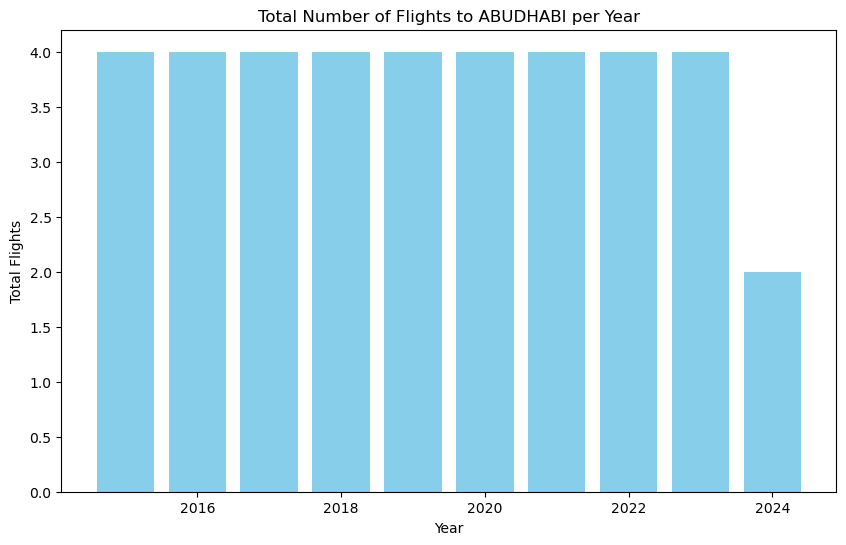

In [53]:
# Filter for ABUDHABI destination
df_abudhabi = df_flights[df_flights['Dest'] == 'ABUDHABI']

# Group and count flights by year
flights_count_abudhabi = df_abudhabi.groupby('Year').size().reset_index(name='Total Flights')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(flights_count_abudhabi['Year'], flights_count_abudhabi['Total Flights'], color='skyblue')
plt.title('Total Number of Flights to ABUDHABI per Year')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.show()


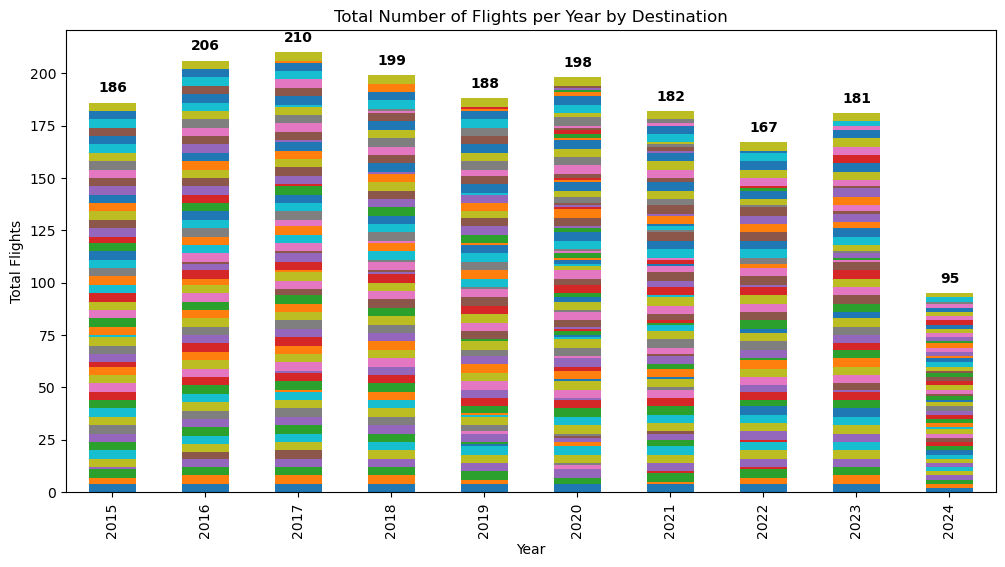

In [54]:
import matplotlib.pyplot as plt

ax = pivot_flights.plot(kind='bar', stacked=True, figsize=(12, 6), legend=False)
plt.title('Total Number of Flights per Year by Destination')
plt.xlabel('Year')
plt.ylabel('Total Flights')

# Add final total above the stack
totals = pivot_flights.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 5, int(total), ha='center', weight='bold')

plt.show()

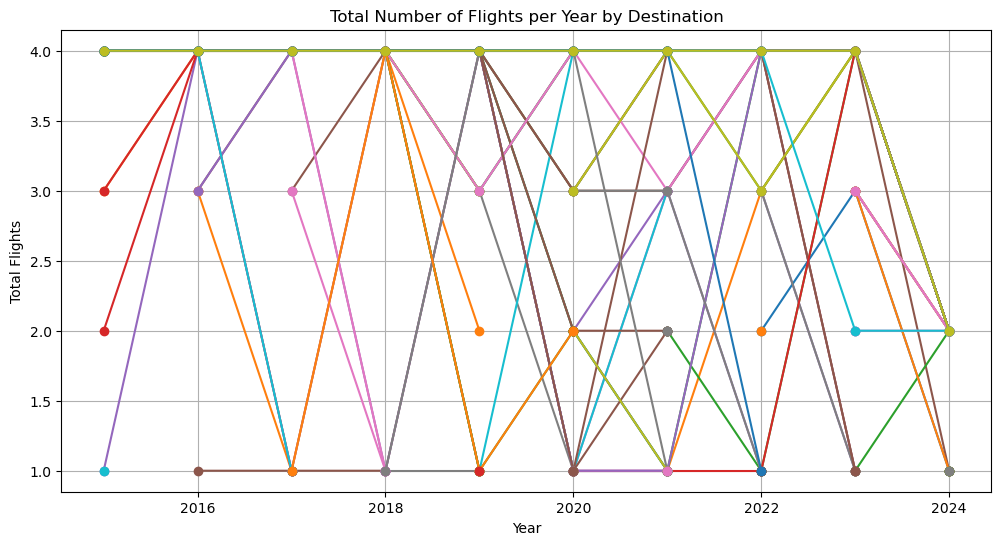

In [55]:
# Plotting the line plot

pivot_flights.plot(kind='line', figsize=(12, 6), marker='o', legend=False)
plt.title('Total Number of Flights per Year by Destination')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.grid(True)
plt.show()


In [56]:
df_flights.columns

Index(['_id', 'Year', 'Quarter', 'Origin', 'Dest', 'Pax From Origin',
       'Pax To Origin', 'Freight From Origin', 'Freight To Origin'],
      dtype='object')

In [57]:
df_flights['Dest'].unique()

array(['ABUDHABI', 'ADDIS ABABA', 'ADEN', 'AMSTERDAM', 'BAHRAIN',
       'BANGKOK', 'BRUSELLS', 'CAIRO', 'COLOGNE', 'COLOMBO', 'DAMMAM',
       'DHAKA', 'DOHA', 'DUBAI', 'FRANKFURT', 'GUANGZHOU',
       'HO CHI MINH CITY', 'HONG KONG', 'ISTANBUL', 'JEDDAH',
       'JOHANNESBERG', 'KARACHI', 'KATHMANDU', 'KUALALUMPUR', 'KUWAIT',
       'LONDON', 'MARUITIUS', 'MEDINA', 'MUENCHEN', 'MUSCAT', 'NAIROBI',
       'NARITA', 'NAVOI', 'NEW YORK', 'NEWARK', 'OSAKA', 'PARIS',
       'RIYADH', 'SANAA', 'SEOUL', 'SEYCHELLES', 'SHANGHAI', 'SHARJAH',
       'SHENZHEN', 'SINGAPORE', 'TAIPAE', 'TEHRAN', 'TELAVIV', 'ZURICH',
       'ANTALYA', 'LEIPZIG', 'LUXEMBOURG', 'MALE', 'MALPENSA', 'DENPASAR',
       'DON MUEANG', 'KIGALI', 'MOSCOW', 'TANGERANG', 'TORONTO',
       'MANCHESTER', 'PHUKET', 'TASHKENT', 'BIRMINGHAM', 'CHITTAGONG',
       'NAJF', 'RASALKHAMA', 'VIENNA', 'AUCKLAND', 'Atyrau', 'BISHKEK',
       'CHICAGO', 'GLASGOW', 'IKEJA', 'KABUL', 'KHARTOUM', 'KIEV',
       'KUTAISI', 'LAPU-LAPU', 'LIEG

In [58]:
# Dictionary mapping 'Dest' to continents
continent_dict = {
    'ABUDHABI': 'Asia',
    'ADDIS ABABA': 'Africa',
    'ADEN': 'Asia',
    'AMSTERDAM': 'Europe',
    'BAHRAIN': 'Asia',
    'BANGKOK': 'Asia',
    'BRUSELLS': 'Europe',
    'CAIRO': 'Africa',
    'COLOGNE': 'Europe',
    'COLOMBO': 'Asia',
    'DAMMAM': 'Asia',
    'DHAKA': 'Asia',
    'DOHA': 'Asia',
    'DUBAI': 'Asia',
    'FRANKFURT': 'Europe',
    'GUANGZHOU': 'Asia',
    'HO CHI MINH CITY': 'Asia',
    'HONG KONG': 'Asia',
    'ISTANBUL': 'Europe',
    'JEDDAH': 'Asia',
    'JOHANNESBERG': 'Africa',
    'KARACHI': 'Asia',
    'KATHMANDU': 'Asia',
    'KUALALUMPUR': 'Asia',
    'KUWAIT': 'Asia',
    'LONDON': 'Europe',
    'MARUITIUS': 'Africa',
    'MEDINA': 'Asia',
    'MUENCHEN': 'Europe',
    'MUSCAT': 'Asia',
    'NAIROBI': 'Africa',
    'NARITA': 'Asia',
    'NAVOI': 'Asia',
    'NEW YORK': 'North America',
    'NEWARK': 'North America',
    'OSAKA': 'Asia',
    'PARIS': 'Europe',
    'RIYADH': 'Asia',
    'SANAA': 'Asia',
    'SEOUL': 'Asia',
    'SEYCHELLES': 'Africa',
    'SHANGHAI': 'Asia',
    'SHARJAH': 'Asia',
    'SHENZHEN': 'Asia',
    'SINGAPORE': 'Asia',
    'TAIPAE': 'Asia',
    'TEHRAN': 'Asia',
    'TELAVIV': 'Asia',
    'ZURICH': 'Europe',
    'ANTALYA': 'Europe',
    'LEIPZIG': 'Europe',
    'LUXEMBOURG': 'Europe',
    'MALE': 'Asia',
    'MALPENSA': 'Europe',
    'DENPASAR': 'Asia',
    'DON MUEANG': 'Asia',
    'KIGALI': 'Africa',
    'MOSCOW': 'Europe',
    'TANGERANG': 'Asia',
    'TORONTO': 'North America',
    'MANCHESTER': 'Europe',
    'PHUKET': 'Asia',
    'TASHKENT': 'Asia',
    'BIRMINGHAM': 'Europe',
    'CHITTAGONG': 'Asia',
    'NAJF': 'Asia',
    'RASALKHAMA': 'Asia',
    'VIENNA': 'Europe',
    'AUCKLAND': 'Oceania',
    'Atyrau': 'Asia',
    'BISHKEK': 'Asia',
    'CHICAGO': 'North America',
    'GLASGOW': 'Europe',
    'IKEJA': 'Africa',
    'KABUL': 'Asia',
    'KHARTOUM': 'Africa',
    'KIEV': 'Europe',
    'KUTAISI': 'Asia',
    'LAPU-LAPU': 'Asia',
    'LIEGE': 'Europe',
    'MANILA': 'Asia',
    'MATTALA': 'Asia',
    'MELBOURNE': 'Oceania',
    'PHNOM PENH': 'Asia',
    'PORT LOUIS': 'Africa',
    'RANGOON': 'Asia',
    'RAS AL-KHAIMAH': 'Asia',
    'ROME': 'Europe',
    'SAN FRANCISCO': 'North America',
    'STANSTED': 'Europe',
    'STOCKHOLM': 'Europe',
    'SYDNEY': 'Oceania',
    'TBILISI': 'Asia',
    'Turkmenabat': 'Asia',
    'Vancouver': 'North America',
    'WASHINGTON, DC': 'North America',
    'AMMAN': 'Asia',
    'DUSSELDORF': 'Europe',
    'HANOI': 'Asia',
    'HOUSTON': 'North America',
    'Kaunas': 'Europe',
    'MIAMI': 'North America',
    'Nanjing': 'Asia',
    'OSH': 'Asia',
    'OSTEND': 'Europe',
    'Seattle': 'North America',
    'WUHAN': 'Asia',
    'YEREVAN': 'Asia',
    'BUCHAREST': 'Europe',
    'DAR ES SALAM': 'Africa',
    'SALALAH': 'Asia',
    'DON MUEANG, BANGKOK': 'Asia',
    'MILAN': 'Europe',
    'MUNICH': 'Europe',
    'NEWARK, NEW YORK': 'North America',
    'PORT LOUIS,MAURITIUS': 'Africa',
    'FUJAIRAH': 'Asia',
    'MONTREAL': 'North America',
    'PARO': 'Asia'
}

# Adding new column 'Continent'
df_flights['Continent'] = df_flights['Dest'].map(continent_dict)

df_flights.head()

,_id,Year,Quarter,Origin,Dest,Pax From Origin,Pax To Origin,Freight From Origin,Freight To Origin,Continent
0,1,2015,1,MUMBAI,ABUDHABI,80696,65961,1940.80,1118.21,Asia
1,2,2015,2,MUMBAI,ABUDHABI,83807,79788,2578.68,1487.49,Asia
2,3,2015,3,MUMBAI,ABUDHABI,86560,70306,2661.29,2017.14,Asia
3,4,2015,4,MUMBAI,ABUDHABI,92011,90657,48903.98,1936.51,Asia
4,5,2015,1,MUMBAI,ADDIS ABABA,20996,16326,2622.94,116.01,Africa


In [59]:
# Save the DataFrame to a CSV file
df_flights.to_csv('new_flights_data.csv', index=False)


In [61]:
df_flights = pd.read_csv(r'new_flights_data.csv')
df_flights.head()

,_id,Year,Quarter,Origin,Dest,Pax From Origin,Pax To Origin,Freight From Origin,Freight To Origin,Continent
0,1,2015,1,MUMBAI,ABUDHABI,80696,65961,1940.80,1118.21,Asia
1,2,2015,2,MUMBAI,ABUDHABI,83807,79788,2578.68,1487.49,Asia
2,3,2015,3,MUMBAI,ABUDHABI,86560,70306,2661.29,2017.14,Asia
3,4,2015,4,MUMBAI,ABUDHABI,92011,90657,48903.98,1936.51,Asia
4,5,2015,1,MUMBAI,ADDIS ABABA,20996,16326,2622.94,116.01,Africa


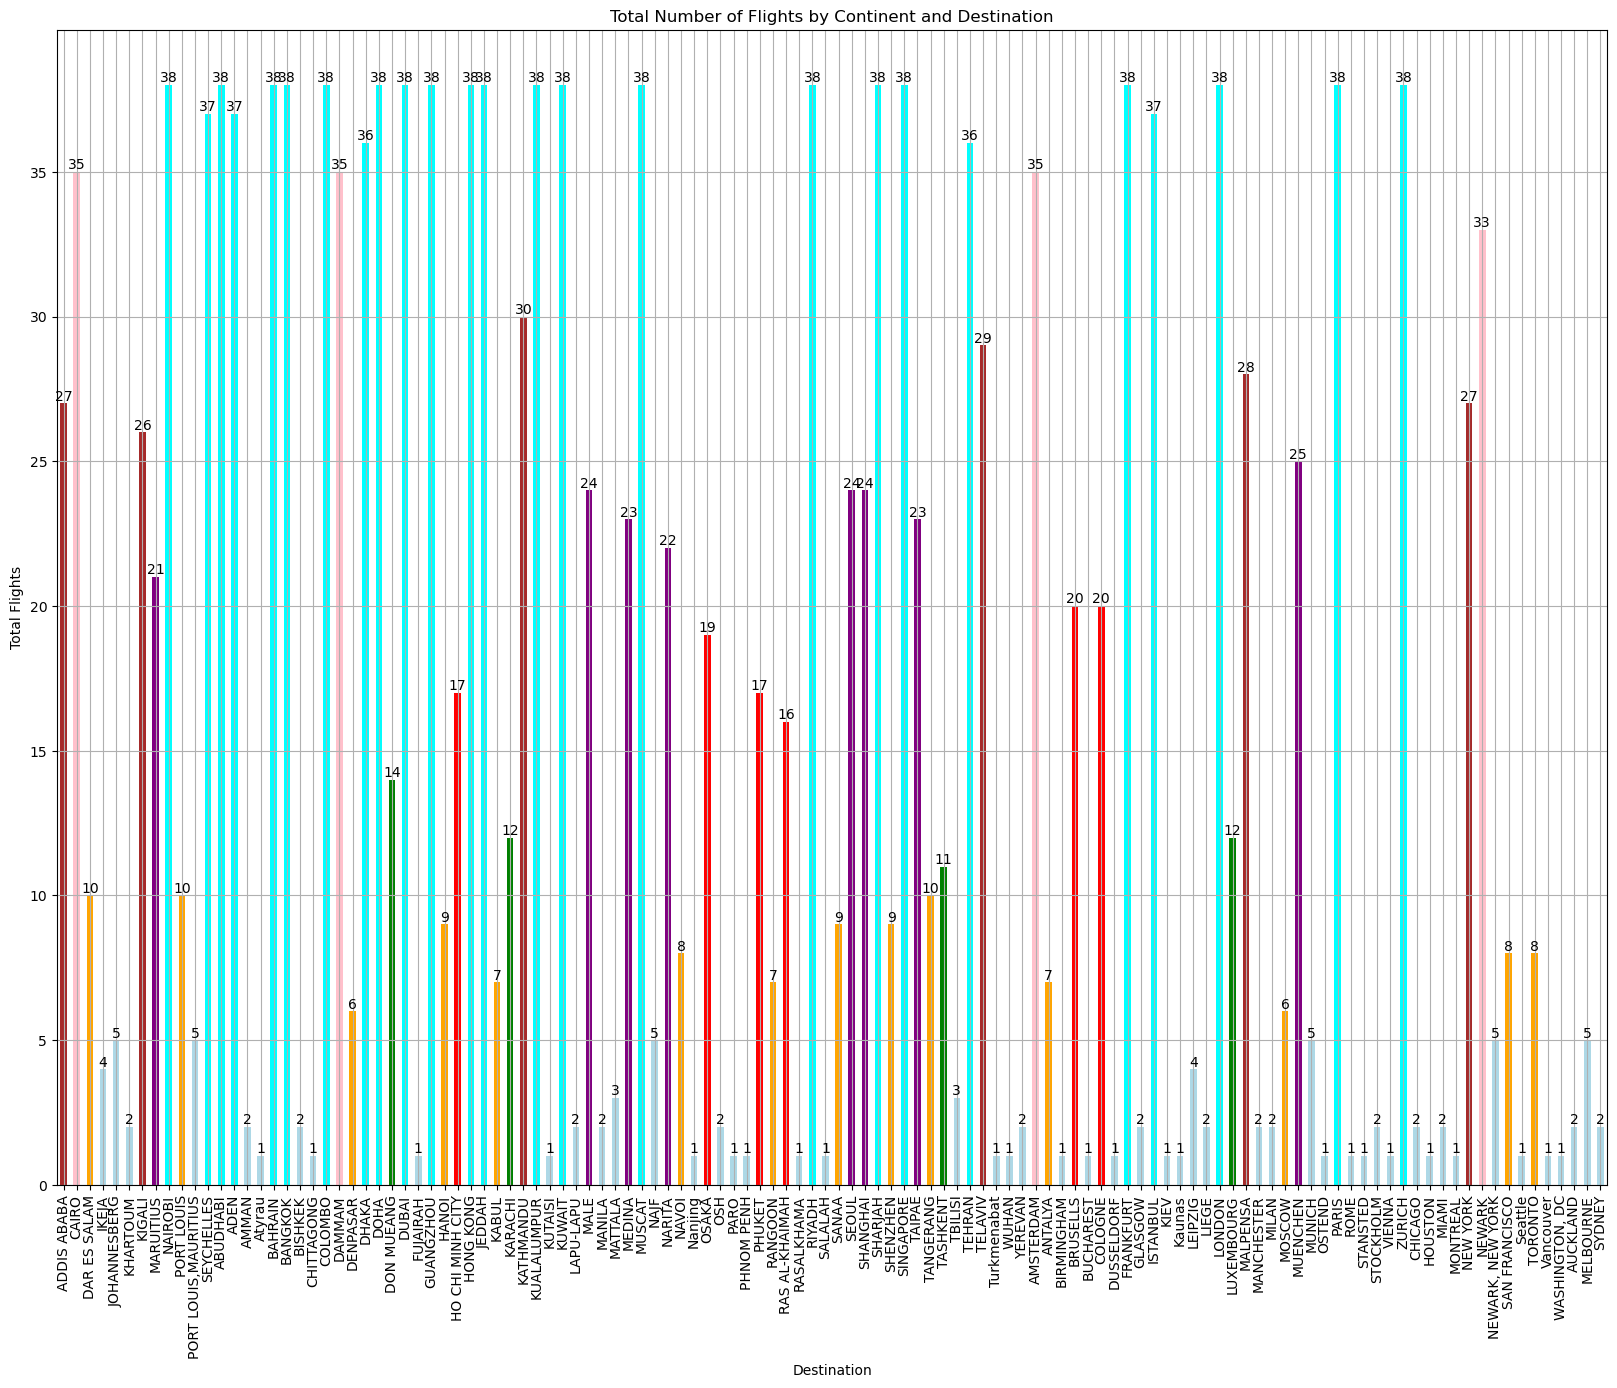

In [65]:
# Group by Continent and Dest to get total number of flights
grouped = df_flights.groupby(['Continent', 'Dest']).size().reset_index(name='Total Flights')

# Define color ranges
def get_color(value):
    if 0 <= value <= 5:
        return 'lightblue'
    elif 6 <= value <= 10:
        return 'orange'
    elif 11 <= value <= 15:
        return 'green'
    elif 16 <= value <= 20:
        return 'red'
    elif 21 <= value <= 25:
        return 'purple'
    elif 26 <= value <= 30:
        return 'brown'
    elif 31 <= value <= 35:
        return 'pink'
    elif 36 <= value <= 40:
        return 'cyan'
    else:
        return 'grey'

# Apply colors based on total flights
colors = grouped['Total Flights'].apply(get_color)

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(20, 15))
grouped.plot(kind='bar', x='Dest', y='Total Flights', ax=ax, legend=False, color=colors)
plt.title('Total Number of Flights by Continent and Destination')
plt.xlabel('Destination')
plt.ylabel('Total Flights')
plt.grid(True)

# Add total number of flights at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

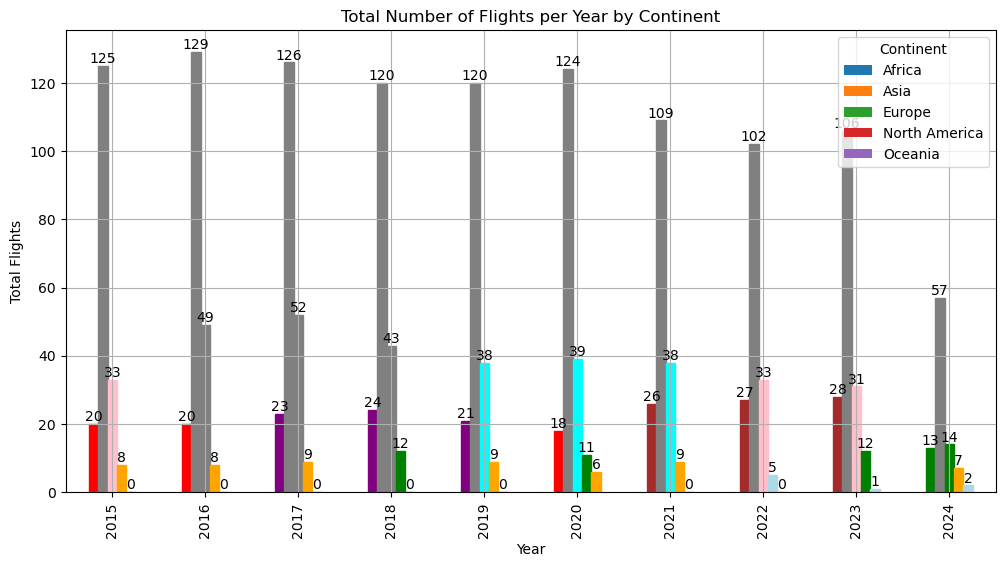

In [69]:
# Group by Year and Continent to get the total number of flights
grouped = df_flights.groupby(['Year', 'Continent']).size().reset_index(name='Total Flights')

# Pivot the table for easier plotting
pivot_flights = grouped.pivot(index='Year', columns='Continent', values='Total Flights')

# Define color ranges
def get_color(value):
    if 0 <= value <= 5:
        return 'lightblue'
    elif 6 <= value <= 10:
        return 'orange'
    elif 11 <= value <= 15:
        return 'green'
    elif 16 <= value <= 20:
        return 'red'
    elif 21 <= value <= 25:
        return 'purple'
    elif 26 <= value <= 30:
        return 'brown'
    elif 31 <= value <= 35:
        return 'pink'
    elif 36 <= value <= 40:
        return 'cyan'
    else:
        return 'grey'

# Apply colors based on total flights
color_series = pivot_flights.applymap(get_color)

# Plotting the grouped data with colors
fig, ax = plt.subplots(figsize=(20, 12))
pivot_flights.plot(kind='bar', stacked=False, figsize=(12, 6), ax=ax, legend=True)

# Apply colors to the bars
for bars, colors in zip(ax.containers, color_series.T.values):
    for bar, color in zip(bars, colors):
        bar.set_color(color)

plt.title('Total Number of Flights per Year by Continent')
plt.xlabel('Year')
plt.ylabel('Total Flights')
plt.grid(True)

# Add total number of flights at the top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()